# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Challenge 2

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [3]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [4]:
# your code here
print(titanic.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


 What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [5]:
# NUMERICAL VARIABLES
# your code here
numerical_variable = titanic.select_dtypes(['int64', 'float64'])
print(numerical_variable.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [6]:
# CATEGORICAL VARIABLES
# your code here
categorical_variable = titanic.select_dtypes([object])
print(categorical_variable.columns.tolist())

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

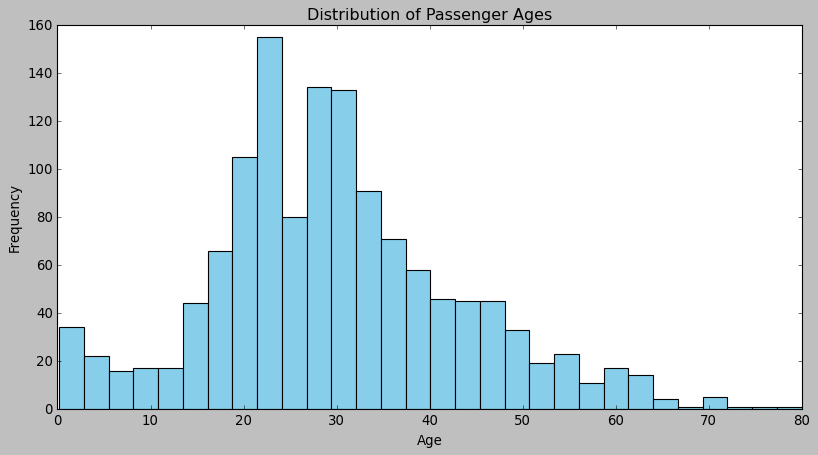

In [7]:
# your code here
plt.style.use('classic')

plt.figure(figsize=(12, 6))

plt.hist(titanic['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()



#### Use the right visulalization to show the distribution of column `Age`.

C:\Users\navin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


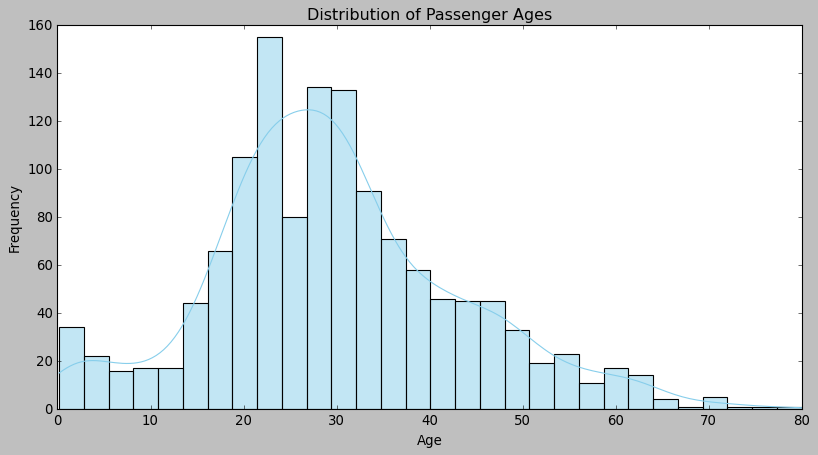

In [8]:
# your code here
plt.figure(figsize=(12, 6))  
sns.histplot(titanic['Age'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

C:\Users\navin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\navin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\navin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


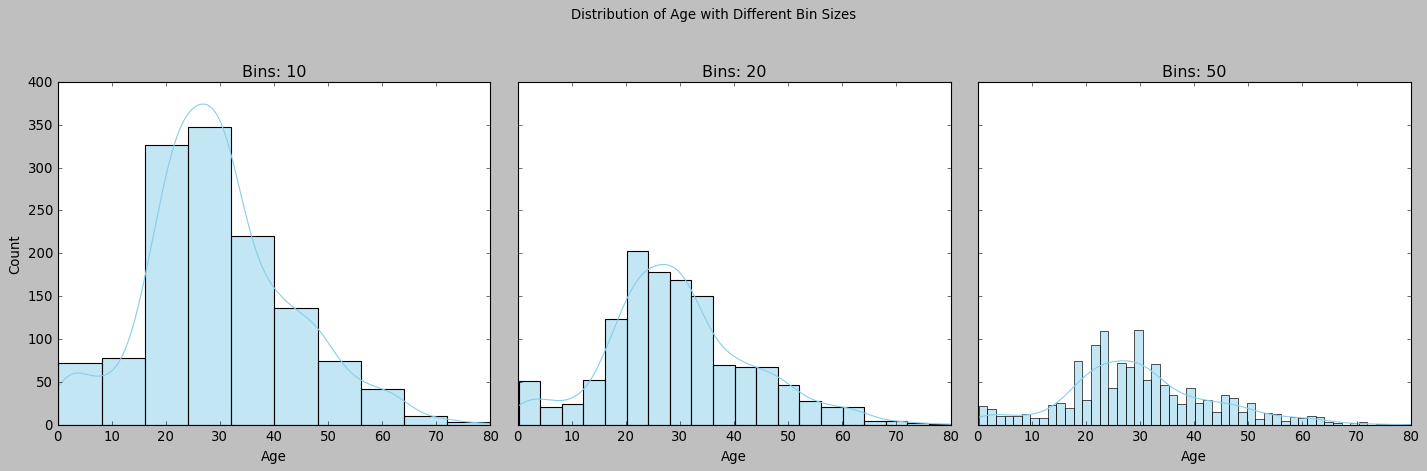

In [9]:
# your code here
# Setup the figure and axes for 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Age with Different Bin Sizes')

# List of bin sizes for demonstration
bin_sizes = [10, 20, 50]

# Loop through bin_sizes and axes to create each subplot
for ax, bins in zip(axes, bin_sizes):
    sns.histplot(titanic['Age'].dropna(), bins=bins, ax=ax, kde=True, color='skyblue')
    ax.set_title(f'Bins: {bins}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
Bin size = 10 show detailed variability.
Bin size = 20 offered a balance, smoothing out minor fluctuations while still showcasing the distribution shape clearly.
Bin size = 50 missing some details regarding the data's distribution.
"""

#### Use seaborn to show the distribution of column `Age`.

C:\Users\navin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


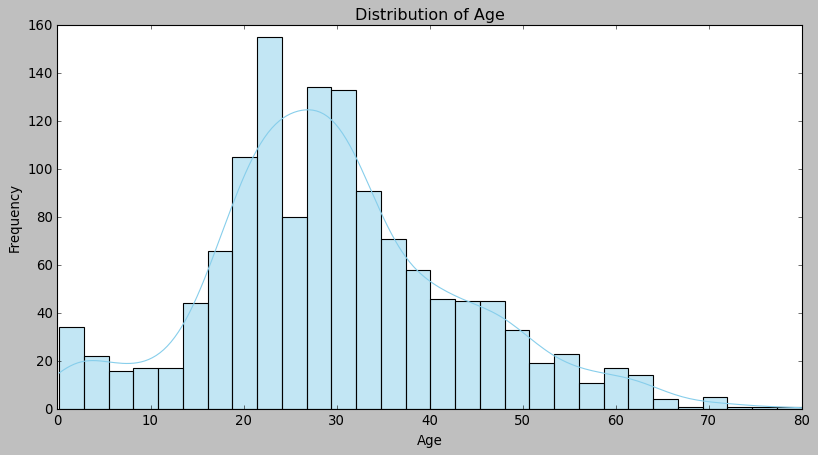

In [10]:
# your code here
plt.figure(figsize=(12, 6))

# Plotting the distribution of 'Age'
sns.histplot(titanic['Age'].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

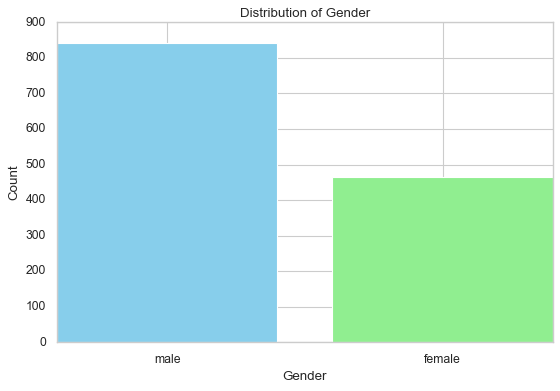

In [13]:
# Method 1 - matplotlib
# your code here
gender_counts = titanic['Gender'].value_counts()

# Creating a bar plot for the 'Gender' column
plt.figure(figsize=(8, 5))
plt.bar(x=gender_counts.index, height=gender_counts.values, color=['skyblue', 'lightgreen'])

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

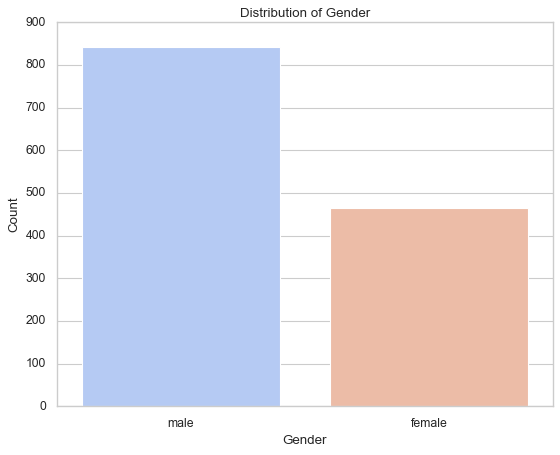

In [11]:
# Method 2 - seaborn
# your code here
sns.set(style="whitegrid")

# Creating a count plot for the 'Gender' column
sns.countplot(x='Gender', data=titanic, palette='coolwarm')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

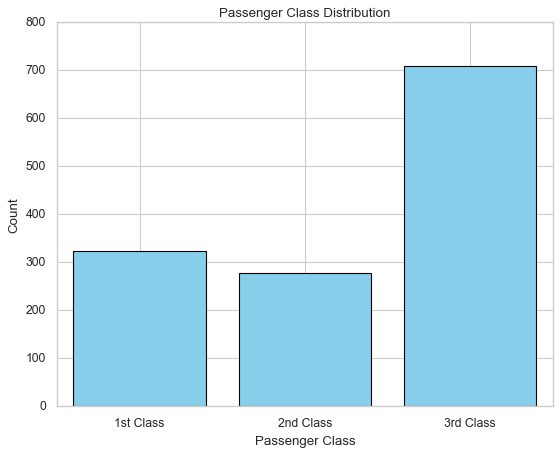

In [14]:
# your code here
pclass_counts = titanic['Pclass'].value_counts().sort_index()

# Create a bar plot
plt.bar(x=pclass_counts.index, height=pclass_counts.values, color='skyblue', edgecolor='black')

plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class']) 
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

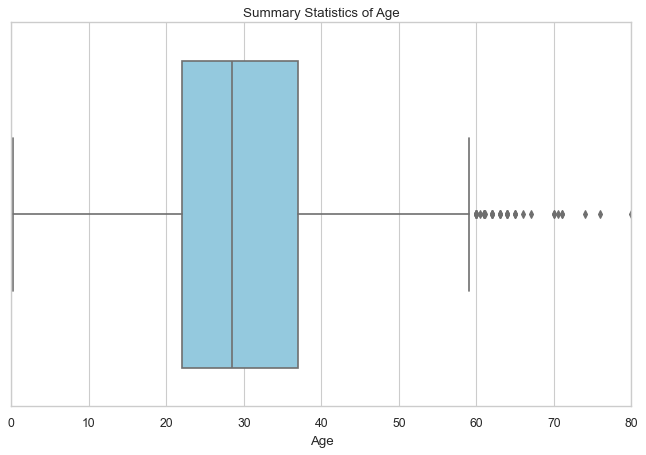

In [15]:
# your code here
plt.figure(figsize=(10, 6))  
sns.boxplot(x=titanic['Age'], color='skyblue')

plt.title('Summary Statistics of Age')
plt.xlabel('Age')

plt.show()

In [ ]:
"""
your comments here
To display the summary statistics of the Age feature from a dataset, a boxplot is a good choice. A boxplot visually represents the central tendency, dispersion, and skewness of the dataset while also highlighting outliers. It shows the median, the first and third quartiles (the edges of the box), and the "whiskers" that indicate variability outside the upper and lower quartiles.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
A boxplot represents the central tendency, dispersion, and skewness of the dataset
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

C:\Users\navin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


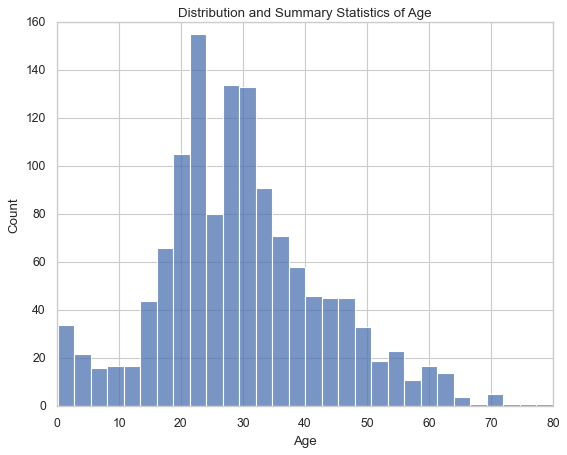

In [21]:
# your code here
sns.histplot(x=titanic['Age'])

plt.title('Distribution and Summary Statistics of Age')
plt.xlabel('Age')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
 Histograms can clearly show if the age distribution is symmetrical, skewed to the left or right, or even bimodal, which suggest the presence of distinct subgroups within the dataset.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

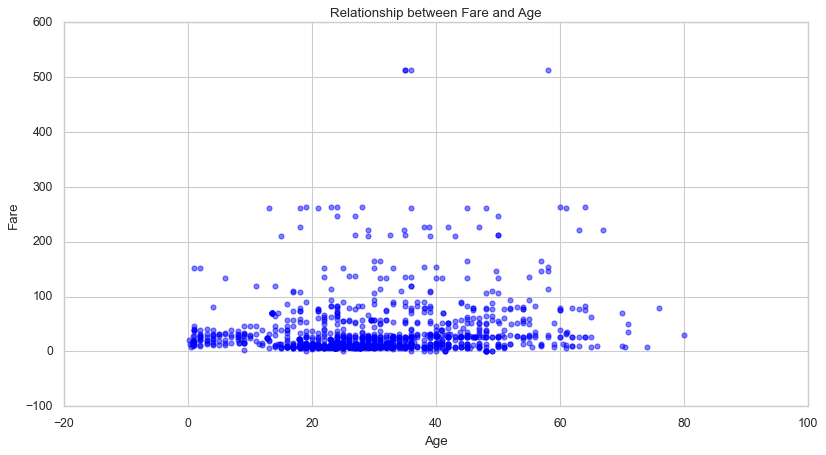

In [24]:
# Method 1 - matplotlib
# your code here
plt.figure(figsize=(12,6))

plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5, color='Blue')
plt.title('Relationship between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


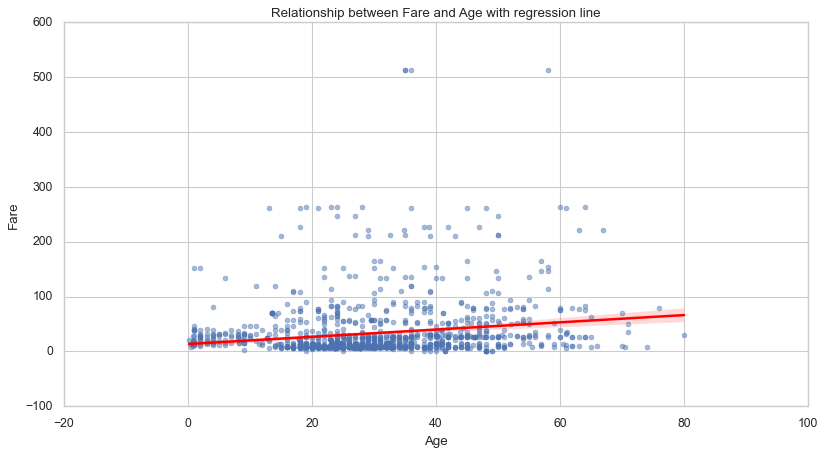

In [27]:
# Method 2 - seaborn
# your code here
plt.figure(figsize=(12,6))
sns.regplot(x='Age', y='Fare', data=titanic, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.title('Relationship between Fare and Age with regression line')

plt.show()

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

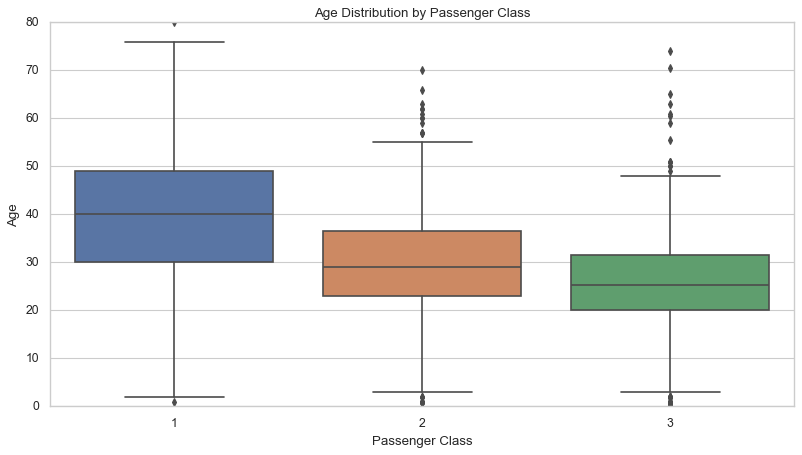

In [28]:
# your code here
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic)

plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

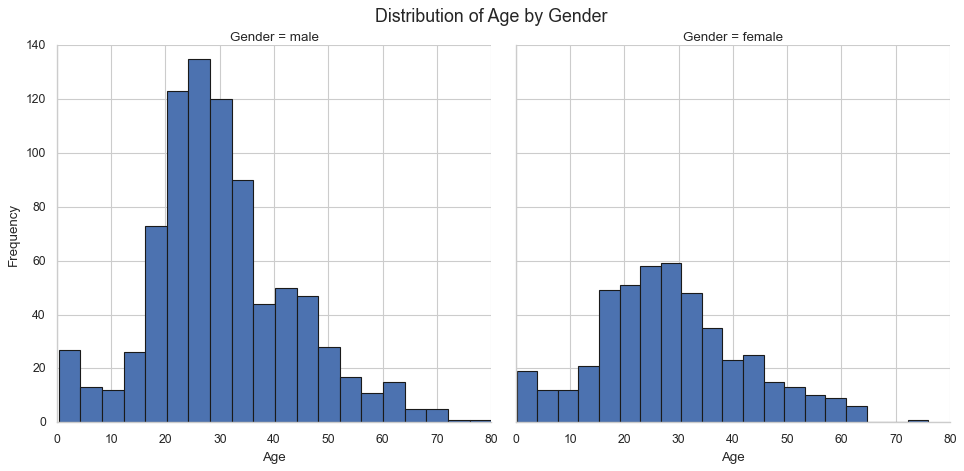

In [29]:
# your code here
g = sns.FacetGrid(titanic, col="Gender", height=6, aspect=1)
# Map histograms to the FacetGrid
g.map(plt.hist, "Age", bins=20, edgecolor="k")

g.set_axis_labels("Age", "Frequency")
g.fig.suptitle('Distribution of Age by Gender', fontsize=16)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

plt.show()

## Challenge 3 - Amazon UK product Dataset

#### **Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

##### **Dataset**: This lab utilizes the [Amazon UK](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/) product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 0 - Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

**Hint**: You can check the Descriptive Stats lesson for a reminder on Inter Quartile Range (IQR).

In [31]:
# your code here
amazon_uk = pd.read_csv('amz_uk.csv')
amazon_uk.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [33]:
Q1 = amazon_uk['price'].quantile(0.25)
Q3 = amazon_uk['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (amazon_uk['price'] < (Q1 - 1.5 * IQR)) | (amazon_uk['price'] > (Q3 + 1.5 * IQR))

# Remove outliers
filtered_df = amazon_uk[~outliers]

print(f"Original products: {len(amazon_uk)}")
print(f"Filtered products: {len(filtered_df)}")

Original products: 2443651
Filtered products: 2115963


Part 1 - Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

Which product category tends to have the highest median price? Don't filter here by top categories.

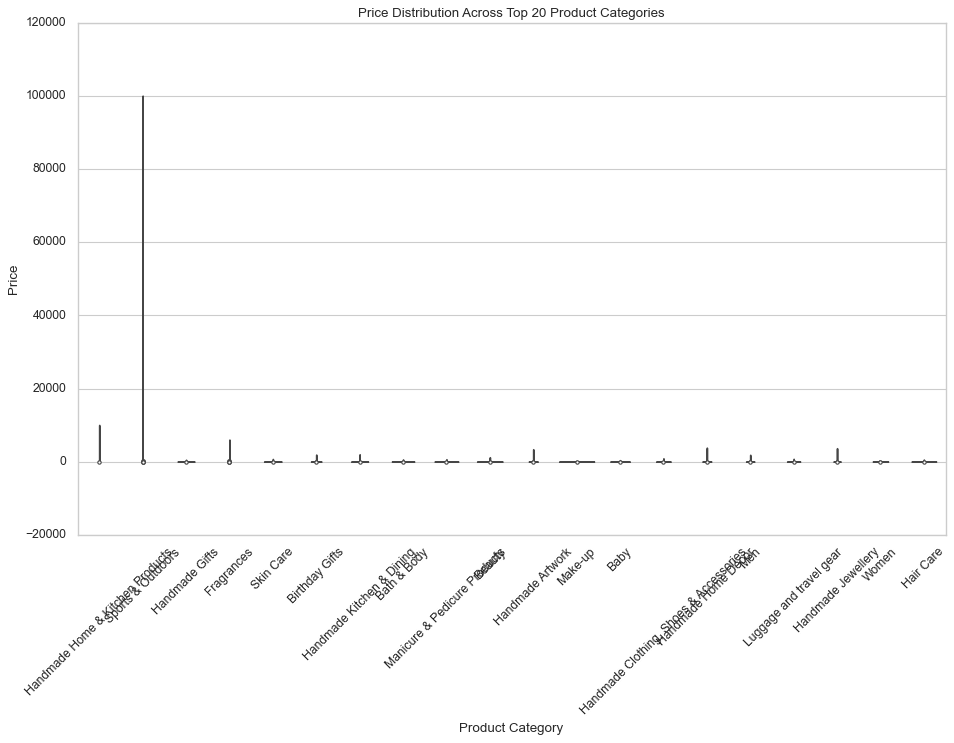

In [55]:
# your code here
top_categories = amazon_uk['category'].value_counts().nlargest(20).index

filtered_df = amazon_uk[amazon_uk['category'].isin(top_categories)]
plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=filtered_df)

plt.xticks(rotation=45)  
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()

### Part 2 - Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

In [38]:
# your code here
top_10_categories = amazon_uk['category'].value_counts().head(10).index

In [40]:
# Group by category and calculate the mean price; 
average_prices_top_10 = amazon_uk[amazon_uk['category'].isin(top_10_categories)] \
    .groupby('category')['price'].mean().sort_values(ascending=False)


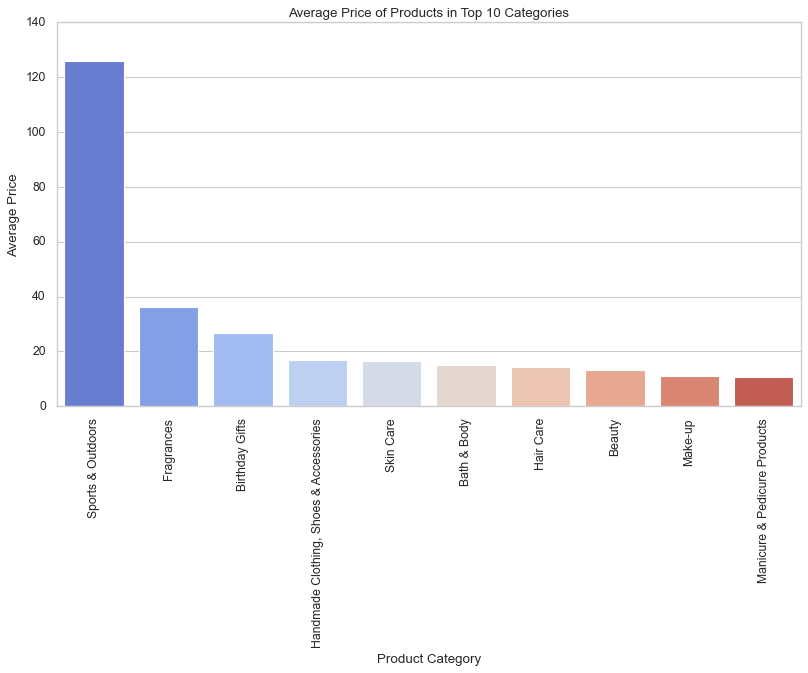

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x=average_prices_top_10.index, y=average_prices_top_10.values, palette='coolwarm')

plt.xticks(rotation = 90)
plt.title('Average Price of Products in Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.show()

In [49]:
average_prices_all = amazon_uk.groupby('category')['price'].mean().sort_values(ascending=False)
highest_average_price_category = average_prices_all.idxmax()
highest_average_price = average_prices_all.max()

print(f"The product category with the highest average price is '{highest_average_price_category}' with an average price of {highest_average_price:.2f}")

The product category with the highest average price is 'Laptops' with an average price of 1087.99


### Part 3 - Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [56]:
# your code here
# Filterthe top 10 categories
filtered_top_10 = amazon_uk[amazon_uk['category'].isin(top_10_categories)]


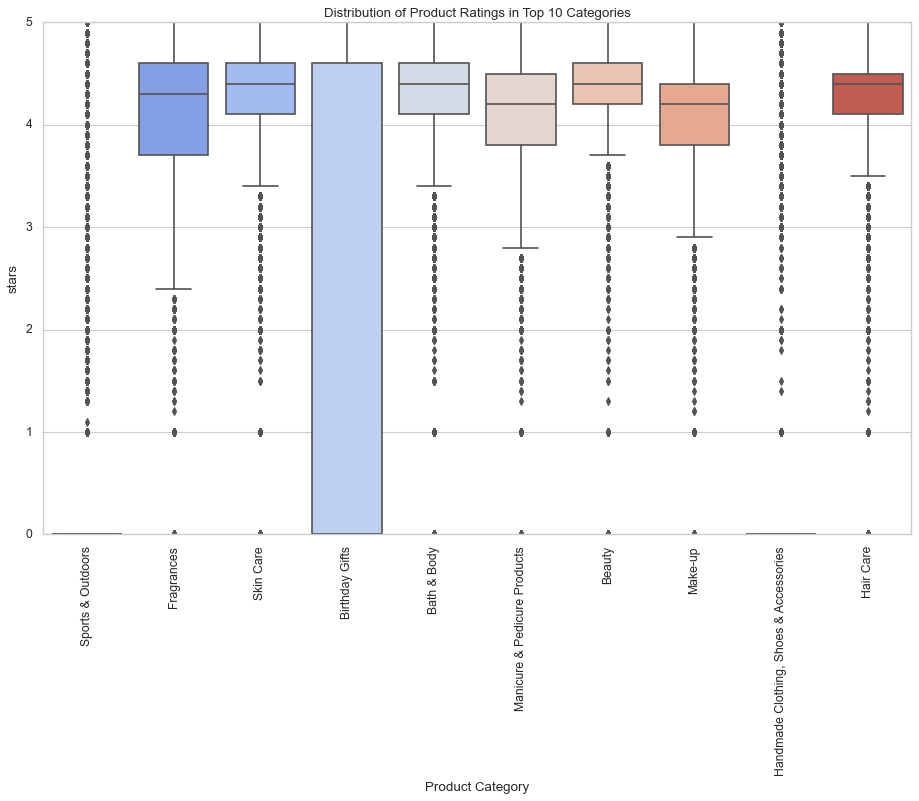

In [59]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=filtered_top_10, palette='coolwarm')

plt.xticks(rotation=90)
plt.title('Distribution of Product Ratings in Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('stars')
plt.show()

In [60]:
highest_median_rating_category = amazon_uk.groupby('category')['stars'].median().idxmax()
highest_median_rating = amazon_uk.groupby('category')['stars'].median().max()

print(f"The category with the highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating}")


The category with the highest median rating is 'Computer Memory' with a median rating of 4.7


### Part 4 - Investigating the Interplay Between Product Prices and Ratings:

Objective: Analyze how product ratings (stars) correlate with product prices.

#### 4.1 - Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [62]:
# your code here
correlation = amazon_uk['price'].corr(amazon_uk['stars'])

print(f"The correlation coefficient between product price and rating is: {correlation}")

The correlation coefficient between product price and rating is: -0.1249067326214861


In [ ]:
#The result implies a strong negative relationship, indicating that as the price increases and the rating tends to decrease.

#### 4.2 - Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

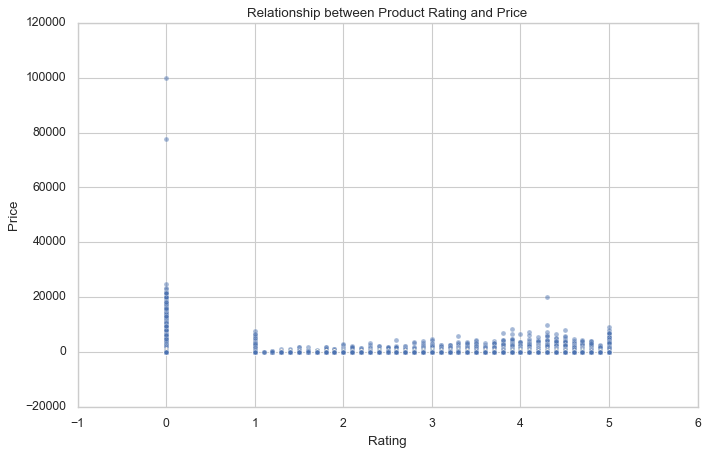

In [63]:
# your code here
#Scattered plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_uk, x='stars', y='price', alpha=0.5)

plt.title('Relationship between Product Rating and Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()


In [66]:
amazon_uk.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

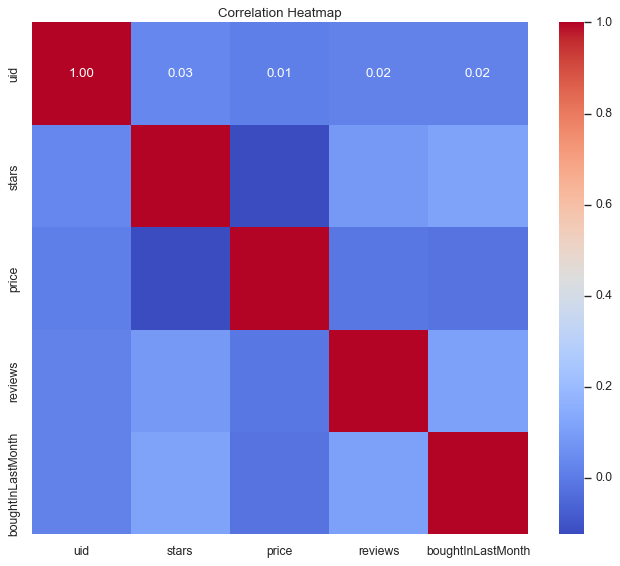

In [69]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(amazon_uk[['uid','stars', 'price','reviews','boughtInLastMonth']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

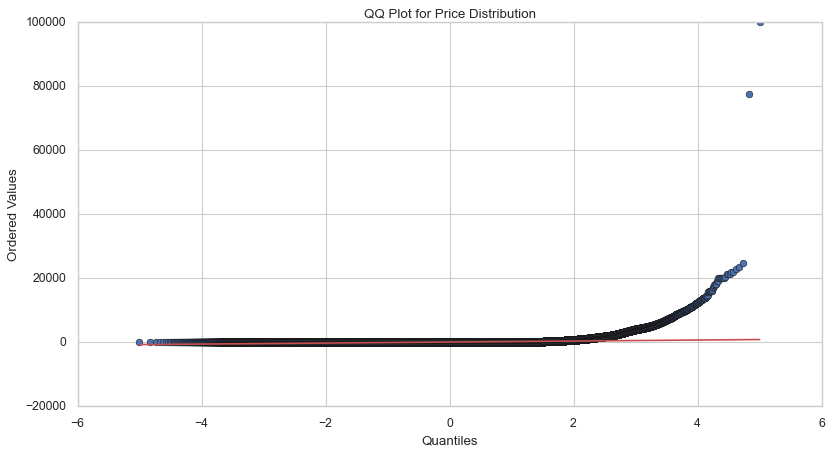

In [73]:
# QQ Plot for Price Distribution
import scipy.stats as stats
prices = amazon_uk['price'].dropna()

plt.figure(figsize=(12, 6))
stats.probplot(prices, dist="norm", plot=plt)
plt.title('QQ Plot for Price Distribution')
plt.xlabel('Quantiles')
plt.ylabel('Ordered Values')
plt.show()